# Watermark to Image Program

In [14]:
import PIL.ImageTk, PIL.Image 
from tkinter import *
import keyboard
import time
import glob
import pandas as pd
import webcolors
import matplotlib.pyplot as plt
import requests
from fuzzywuzzy import fuzz
import spacy
nlp = spacy.load('en_core_web_sm')
import requests
from io import BytesIO

In [62]:
imageList = []
for filename in glob.glob('/Users/christineong/Desktop/*.jpeg'): #assuming gif
    im=filename
    imageList.append(im)
    
print("Type in the number beside the image you want to choose")
for i in range(len(imageList)):
    print(f"{i}: {imageList[i]}")
userInput = input()

Type in the number beside the image you want to choose
0: /Users/christineong/Desktop/Unknown.jpeg
0


In [63]:
image1=PIL.Image.open(imageList[int(userInput)])
image1.resize((200, 200))
watermark=PIL.Image.open("/Users/christineong/Desktop/watermark.png")
watermark=watermark.resize((50, 50))
image1.paste(watermark, (10, 10), watermark)

In [64]:
image1.save(f"{imageList[int(userInput)]}")

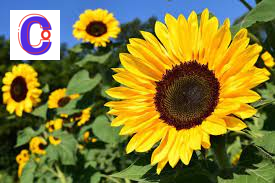

In [65]:
image1

# Typing Speed Test

In [118]:
print('Type the phrase "The quick brown fox jumps over the lazy dogs." five times. Then, press enter.\n')
start = time.time()
userInput = input()
end = time.time()
actualPhrase = "The quick brown fox jumps over the lazy dogs. The quick brown fox jumps over the lazy dogs. The quick brown fox jumps over the lazy dogs. The quick brown fox jumps over the lazy dogs. The quick brown fox jumps over the lazy dogs."
totalTime = end-start
missedLetters = 0
actualPhraseList = list(actualPhrase)
for i in userInput:
    try:
        actualPhraseList.remove(i)
    except:
        missedLetters+=1
missedLetters+=len(actualPhraseList)

print(f"\nYour total time was: {totalTime} seconds, and you missed {missedLetters} letters.")

Type the phrase "The quick brown fox jumps over the lazy dogs." five times. Then, press enter.

he quick brown fox jumps over the lazy dogs. he quick brown fox jumps over the lazy dogs. he quick brown fox jumps over the lazy dogs. he quick brown fox jumps over the lazy dogs. he quick brown fox jumps over the lazy dogs.

Your total time was: 12.458626985549927 seconds, and you missed 5 letters.


In [31]:
print(len(actualPhrase))

229


# Color Palatte from Photograph Generator

In [15]:
imageList = []
response = requests.get("https://images.squarespace-cdn.com/content/v1/5c6494bbf4e5310e57b3de34/1623557067947-PN4CQHL8B84UEXR4K9CP/Capture.PNG")
image2 = PIL.Image.open(BytesIO(response.content))


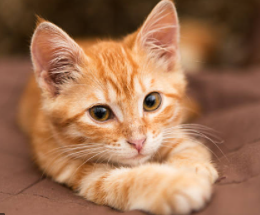

In [16]:
image2

In [6]:
imageColors = []
image2.size
rgb = image2.convert('RGB')
for x in range(image2.size[0]):
    for y in range(image2.size[1]):
        imageColors.append(str(rgb.getpixel((x, y))))
imageColors = set(imageColors)

In [7]:
df = pd.DataFrame(imageColors)
df

,0
0,"(177, 132, 77)"
1,"(106, 124, 74)"
2,"(38, 38, 38)"
3,"(205, 153, 96)"
4,"(90, 78, 66)"
...,...
25441,"(137, 152, 119)"
25442,"(192, 168, 124)"
25443,"(192, 166, 143)"
25444,"(142, 103, 62)"


In [8]:
df = df[0].value_counts().reset_index(name='Count')

In [9]:
df = df.sort_values("Count", ascending=False)
print(df)

                 index  Count
0       (177, 132, 77)      1
16972     (38, 38, 38)      1
16970     (90, 78, 66)      1
16969  (193, 190, 197)      1
16968  (171, 152, 119)      1
...                ...    ...
8479   (192, 166, 143)      1
8478    (142, 103, 62)      1
8477   (160, 117, 101)      1
8476   (144, 169, 140)      1
25445  (128, 152, 100)      1

[25446 rows x 2 columns]


In [10]:
listy = df["index"][0:10]
parsedListy = []
for i in listy:
    parsedListy.append(tuple([int(i2) for i2 in i[1:-1].split(", ")]))

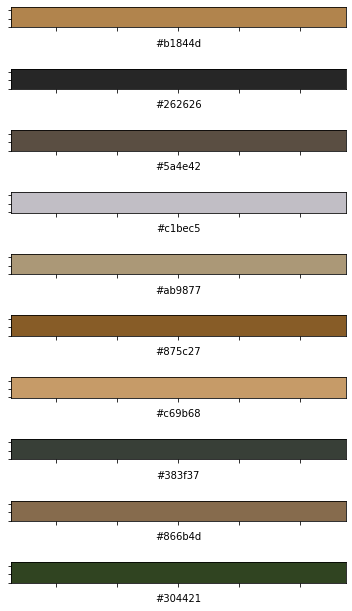

In [11]:
fig, ax = plt.subplots(10)
fig.subplots_adjust(left=None, bottom=0.0, right=None, top=2.0, wspace=0.0, hspace=2.0)
for i in range(len(parsedListy)):
    ax[i].set_facecolor("#"+'%02x%02x%02x' % parsedListy[i])
    ax[i].axes.xaxis.set_ticklabels([])
    ax[i].axes.yaxis.set_ticklabels([])
    ax[i].set_xlabel("#"+'%02x%02x%02x' % parsedListy[i])
 
    ax[i].plot(111)

# Word to Emoji Converter

In [77]:
emojis = pd.read_csv("full_emoji.csv")

In [78]:
emojisDf = emojis[["emoji", "name"]]
pic = emojisDf["emoji"].to_list()
words = emojisDf["name"].to_list()
words = [i.lower() for i in words]

In [49]:
userInput = input("How would you like to search for your poem? \n1: By a line\n2: By author\n3: By title\n4: By title AND author\nPlease Enter the corresponding number below:\n\n")

How would you like to search for your poem? 
1: By a line
2: By author
3: By title
4: By title AND author
Please Enter the corresponding number below:

2


In [50]:
seperatedBy = ""
if int(userInput)==1:
    variable = "line"
elif int(userInput)==2:
    variable = "author"
elif int(userInput)==3:
    variable = "title"
else:
    variable = "author and title"
    seperatedBy = "seperated by a space"
lineInput = input(f"Enter in the {variable} of your poem {seperatedBy}:\n")

Enter in the author of your poem :
William Shakespeare


In [57]:
line = "%20".join(lineInput.split(" "))
line2 = lineInput.split(" ")
urlLines = f"https://thundercomb-poetry-db-v1.p.rapidapi.com/lines/{line}"
urlAuthor = f"https://thundercomb-poetry-db-v1.p.rapidapi.com/author/{line}"
urlTitle = f"https://thundercomb-poetry-db-v1.p.rapidapi.com/title/{line}"
urlTitleAuthor = f"https://thundercomb-poetry-db-v1.p.rapidapi.com/author,title/%7B{line2[0]}%7D;%7B{line2[1]}%7D"

def getResponse(url):
    headers = {
        "X-RapidAPI-Host": "thundercomb-poetry-db-v1.p.rapidapi.com",
        "X-RapidAPI-Key": "c50d863277msh049d5d9b0b8e8d0p143fafjsnb28b9d87ac7d"
    }

    response = requests.request("GET", url, headers=headers).json()
    for i in range(len(response)):
        print(f"{i}: {response[i]['title']}")
    poemNumber = input("Type in the number beside the poem you need:\n")
    return response[int(poemNumber)]["lines"]

In [63]:
poem = []
if int(userInput)==1:
    poem = getResponse(urlLines)
elif int(userInput)==2:
    poem = getResponse(urlAuthor)
elif int(userInput)==3:
    poem = getResponse(urlTitle)
else:
    poem = getResponse(urlTitleAuthor)
    

0: A Lover's Complaint
1: Spring and Winter ii
2: Spring and Winter i
3: Spring
4: Orpheus with his Lute Made Trees
5: Blow, Blow, Thou Winter Wind
6: Under the Greenwood Tree
7: Winter
8: Sonnet 1: From fairest creatures we desire increase
9: Sonnet 2: When forty winters shall besiege thy brow
10: Sonnet 3: Look in thy glass and tell the face thou viewest
11: Sonnet 4: Unthrifty loveliness, why dost thou spend
12: Sonnet 5: Those hours, that with gentle work did frame
13: Sonnet 6: Then let not winter's ragged hand deface
14: Sonnet 7: Lo! in the orient when the gracious light
15: Sonnet 8: Music to hear, why hear'st thou music sadly?
16: Sonnet 9: Is it for fear to wet a widow's eye
17: Sonnet 10: For shame! deny that thou bear'st love to any
18: Sonnet 11: As fast as thou shalt wane, so fast thou grow'st
19: Sonnet 12: When I do count the clock that tells the time
20: Sonnet 13: O! that you were your self; but, love you are
21: Sonnet 14: Not from the stars do I my judgement pluck
2

Type in the number beside the poem you need:
0


In [64]:
def dfSearch(word):
    listyEmojis = [pic[i] for i in range(len(pic)) if fuzz.ratio(word.lower(), words[i])>85]
    return listyEmojis[0]

In [2]:
def dfSearch(word):
    word = nlp(word)
    listyEmojis = [pic[i] for i in range(len(pic)) if fuzz.ratio(word.lemma.lower(), words[i])>85]
    return listyEmojis[0]

In [3]:
emojiPoem = []

for i in poem:
    finalLine = []
    poemLine = i.split(" ")
    for i2 in poemLine:
        try:
            finalLine.append(dfSearch(i2))
        except:
            finalLine.append(i2)
    emojiPoem.append(" ".join(finalLine))

NameError: name 'poem' is not defined

In [ ]:
print("\n".join(emojiPoem))

In [ ]:
print("\n".join(poem))

# Enter in your own Phrase

In [4]:
poem = input("Enter in a phrase to turn it into emojis:\n")


Enter in a phrase to turn it into emojis:
i love you hazel you are the best cat ever even though you scratch people and meow way too much.


In [5]:
emojiPoem = []
for i in poem.split(" "):
    try:
        emojiPoem.append(dfSearch(i))
    except:
        emojiPoem.append(i)

In [6]:
" ".join(emojiPoem)

'i love you hazel you are the best cat ever even though you scratch people and meow way too much.'

In [7]:
poem

'i love you hazel you are the best cat ever even though you scratch people and meow way too much.'